In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks,peak_prominences
from opensignalsreader import OpenSignalsReader

Importamos los datos del .txt generado por OpenSignals y los pasamos a un formato legible para la función de scipy find_peaks,  extraemos los datos necesarios y excluímos los datos pertenecientes a otros complejos, ondas y el ruido seleccionando un rango de alturas razonable para después hacer una media del valor de los picos y llevarlos a nuestro estudio.

In [3]:
def findHeight (data,peaks):
    mins = [0]
    maxs = [0]
    rango = [0]
    for i in range(0,len(peaks)):
        rango = data[int(peaks[i])-80:int(peaks[i])+120]
        mins.append(min(rango))
        maxs.append(max(rango))
    heights = np.zeros_like(mins)
    for i in range(0,len(maxs)):
        heights[i]=maxs[i]-mins[i]
    return heights

def conversor (data):
    datos = np.zeros_like(data)
    n = 10 #channel bits
    VCC = 3.3 #operating voltage (V)
    Gecg = 1100 #ganancia del sensor
    for i in range(0,len(data)):
        datos[i] = ((((data[i]/(pow(2,n)))-(1/2))*VCC)/Gecg)*1000
    return datos

media amplitudes = 0.7248046875
tiempo transcurrido: 64.05 picos detectados: 79
frecuencia cardiaca = 74.00468384074942


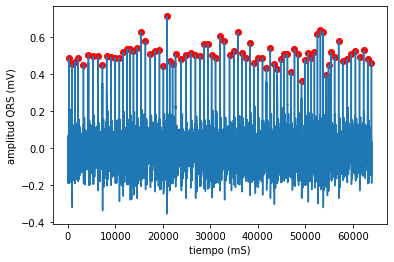

In [7]:
acq = OpenSignalsReader('paciente_33.txt')
data = acq.raw('ECG') #valores que toma el ECG

converted_data = conversor(data[:]) #datos en mV
peaks, _ = find_peaks(converted_data,height=[0.0,2.0],prominence = 0.35,distance = 300) #posición de los picos del ECG
alturas = findHeight(converted_data,peaks)
print('media amplitudes = ' + str(np.mean(alturas))) #media de las amplitudes del complejo QRS del ECG

print('tiempo transcurrido: ' + str(converted_data.size/1000) + ' picos detectados: ' + str(peaks.size)) #intervalo de tiempo (S) en el que se realizó el experimento y picos válidos para el estudio
print('frecuencia cardiaca = ' + str((peaks.size/(converted_data.size/1000))*60)) #frecuencia cardiaca
values = converted_data[peaks] #valores de los picos del ECG
plt.xlabel('tiempo (mS)')
plt.ylabel('amplitud QRS (mV)')
plt.plot(peaks,values, "or",); plt.plot(converted_data);
plt.show()